In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager, rc
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
colors = ['#1a508b', "#d1495b", "#00798c",'#edae49', '#66a182', # 컬러맵
          '#4a4a4a','#e3120b', '#c5a880', '#9F5F80', '#6F9EAF',
          '#0278ae','#F39233', '#A7C5EB', '#ABCE74', '#d6b0b1',
          '#cdd0cb', '#ffb396', '#6930c3', '#58391c', '#54E346']
sns.color_palette(colors[:10])

[(0.10196078431372549, 0.3137254901960784, 0.5450980392156862),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.0, 0.4745098039215686, 0.5490196078431373),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (0.7725490196078432, 0.6588235294117647, 0.5019607843137255),
 (0.6235294117647059, 0.37254901960784315, 0.5019607843137255),
 (0.43529411764705883, 0.6196078431372549, 0.6862745098039216)]

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
dataset = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, 
                                                    test_size=0.4)

모델 학습

In [5]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

### MLFLOW 지원하에 분류기 학습하기

In [7]:
!pip install mlflow

     |████████████████████████████████| 17.8 MB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.1 MB/s  eta 0:00:01
     |████████████████████████████████| 79 kB 8.0 MB/s  eta 0:00:01
     |████████████████████████████████| 62 kB 1.6 MB/s  eta 0:00:01
     |████████████████████████████████| 181 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 210 kB 10.9 MB/s eta 0:00:01
     |████████████████████████████████| 146 kB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 151 kB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 3.4 MB/s  eta 0:00:01
     |████████████████████████████████| 78 kB 7.6 MB/s  eta 0:00:01
  Created wheel for databricks-cli: filename=databricks_cli-0.16.6-py3-none-any.whl size=112626 sha256=111042262e0ae568cb61ce6cf490e158ac399e784c9d24e4dbb1fb36ec853053
  Stored in directory: /home/sguys99/.cache/pip/wheels/af/e4/ed/c601b319f71b0c442f62feba2a97b37617b2bf9e3f9fd6190b
Successfully built databricks-c

In [8]:
import mlflow

In [9]:
# 로컬 디렉토리에 자동 로깅 하도록함, 사용하는 머신러닝 라이브러리에 의해 만들어지는 메트릭 들을 캡쳐한다.\
# MLFLOW의 Tracking이 metrics와 logs를 다루는 것을 관할한다.
# 그리고 run을 하면 메타 데이터가 로컬 파일시스템에 저장된다.
mlflow.sklearn.autolog()

In [12]:
with mlflow.start_run():
    clf = LogisticRegression()
    clf.fit(X_train, y_train)

2022/05/24 18:08:45 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: [Errno 13] Permission denied: '/C:'


디렉토리에 mlruns가 생성되었을 것이다.

In [11]:
ls

'Ch01 Introducing MLFlow.ipynb'*   Untitled.ipynb*   mlruns/   stockpred/


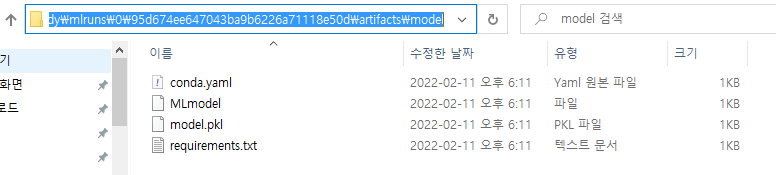

디렉토리 안에 위와 같은 것들이 담겨 잇다.

각 실험은 긴 숫자로된 UUID로 관리된다.

meta.yaml 파일 열어보면 다음 정보가 있음

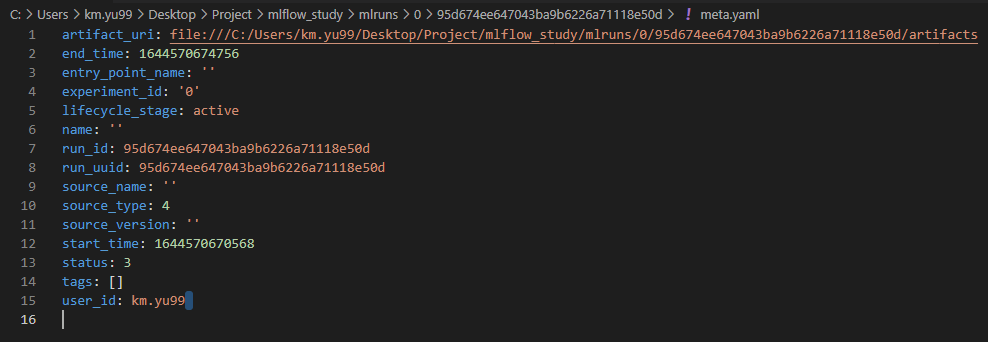

- 이것이 해당 실험의 기본 메타정보이다.

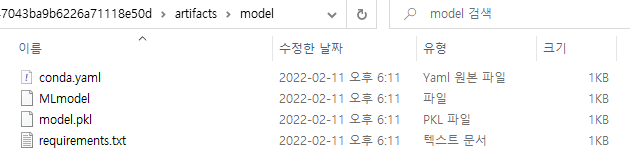

- 모델 폴더 안에는 모델의 피클 파일이 있다.

### 이제  MLflow 모듈을 살펴보자.

다음은 mlflow에 탑재된 모듈이다.

• MLflow Tracking: 메트릭과 ML 실행으로 생성된 것들(학습, 예측)을 다루기 위한 UI 등을 제공  
• Mlflow Projects: ML 프로젝트에 표준화를 위한 패키지 포맷  
• Mlflow Models: 각기 다른 환경에서 배포하기 위한 메커니즘. 예를 들어 온프레미스 또는 클라우드  
• Mlflow Model Registry: 모델 관리, 라이프 사이클, 상태 등을 관리하는 모듈  

### Exploring MLflow projects

mlflow projects에 의해 conda, docker, 로컬 시스템이 지원된다.

Once you have your environment, the main file that defines how your project should look
is the MLProject file. This file is used by MLflow to understand how it should run your
project.